# ADS 509 Module 3: Group Comparison 
## Halee Staggs
### Disclaimer: ChatGPT4.o was used as a tool for this assignment. All code was verified for accuracy. Code blocks are commented with Chat-assisted code.

In [16]:
# Import libraries and functions
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
#!pip install wordcloud
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [39]:
# Use this space for any additional import statements you need
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Save Settings

In [10]:
# Define list of stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")


### Create Functions

In [17]:
# Import full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# Function to identify number of emojis in a string    
def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return(len(emojis) > 0)

In [18]:
# Aided with ChatGPT4.o
# Create function for descriptive stats
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
 # Given a list of tokens...
    total_tokens = len(tokens)  # Number of tokens
    unique_tokens = len(set(tokens))  # Number of unique tokens
    num_characters = sum(len(token) for token in tokens)  # Numbers of characters
    lexical_diversity = unique_tokens / total_tokens if total_tokens > 0 else 0  # Lexical diversity
    
    # Calculate the most common tokens
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(num_tokens)
    
    # Set up statement syntax
    if verbose:
        print(f"There are {total_tokens} tokens in the data.")
        print(f"There are {unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The {num_tokens} most common tokens are:")
        for token, count in most_common_tokens:
            print(f"'{token}': {count} times")
    
    # Return list of values
    return [total_tokens, unique_tokens, lexical_diversity, num_characters]

In [65]:
# Aided with ChatGPT4.o
# Remove specific punctuation characters
def remove_punctuation(text):
    # Quotes were being ignored, so stripping them out manually
    additional_punctuation = "’‘“”"
    for char in additional_punctuation:
        text = text.replace(char, "")
    # Remove all punctuation except for the hash symbol to retain hashtags
    punctuation_without_hash = string.punctuation.replace('#', '')
    return text.translate(str.maketrans('', '', punctuation_without_hash))

# Split on whitepsace and convert to lowercase
def tokenize_and_lowercase(text):
    return word_tokenize(text.lower())

# Remove stopwords from list of defined words
def remove_stopwords(tokens):
    return [token for token in tokens if token not in sw]

In [26]:
# Aided with ChatGPT4.o
# Function for preprocessing pipeline
def prepare(text, pipeline):
    for transform in pipeline:
        text = transform(text)
    return text

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [11]:
# Location of data on machine
data_location = r"C:\Users\Halee\Downloads\M1AssignmentData"

# Define subfolders
twitter_folder = os.path.join(data_location, "M1Results", "twitter")
lyrics_folder = os.path.join(data_location, "M1Results", "lyrics")

print("Twitter folder path:", twitter_folder)
print("Lyrics folder path:", lyrics_folder)


Twitter folder path: C:\Users\Halee\Downloads\M1AssignmentData\M1Results\twitter
Lyrics folder path: C:\Users\Halee\Downloads\M1AssignmentData\M1Results\lyrics


In [30]:
# Aided with ChatGPT4.o
# Creat function to read in Twitter data
def combine_twitter_to_dataframe(directory):
    data = []

    # Iterate through all files in the directory
    for root, _, files in os.walk(directory):
        for file in files:
            if "_data" in file and file.endswith(".txt"):  # Confirm files are text files that contain follower data
                try:
                    # Read the content of the file as tab-delimited, skipping bad lines
                    file_path = os.path.join(root, file)
                    
                    # Read in files as tab-delimited dataframe
                    # Skip lines that have missing data or abnormal structure
                    df_temp = pd.read_csv(file_path, delimiter='\t', on_bad_lines = 'skip')

                    # Extract the artist name from the file name since its the first keyword 
                    artist = file.split('_')[0]

                    # Check if 'description' column exists in the df_temp
                    if 'description' in df_temp.columns:
                        # Append the artist name and the description column to the data list
                        for description in df_temp['description']:
                            data.append([artist, description])
                    else:
                        print(f"Column 'description' not found in file {file}")

                except Exception as e:
                    print(f"Error processing file {file}: {e}")

    # Create the final DataFrame
    if data:
        df = pd.DataFrame(data, columns=['artist', 'description'])
    else:
        df = pd.DataFrame(columns=['artist', 'description'])

    return df

In [31]:
# Compile twitter by applying function to specified file path of twitter data
twitter_df = combine_twitter_to_dataframe(twitter_folder)
twitter_df  # Confirm both artists were added along with descriptions

,artist,description
0,cher,NaN
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,csu
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...
...,...,...
4268136,robynkonichiwa,"singer of songs, type 1 diabetic, tired $jakel..."
4268137,robynkonichiwa,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...
4268138,robynkonichiwa,A year to change a life is still a year ✨😌
4268139,robynkonichiwa,Head of Consumer - Mango. Made in Melbourne. R...


In [32]:
# Aided with ChatGPT4.o
# Create function to combine lyrics data into one dataframe
def combine_lyrics_to_dataframe(directory):
    data = []  # Create empty list to append data to

    # Iterate through all files in the directory
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):  # Specify to find text files with lyric data
                try:
                    # Get the artist name from the parent folder
                    artist = os.path.basename(root)

                    # Read the content of the file
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        lines = f.readlines()

                    # Get the song name from the first line of the file
                    songname = lines[0].strip()

                    # Combine the rest of the lines into lyrics
                    lyrics = ''.join(lines[1:]).strip()

                    # Append the data to the list
                    data.append([artist, songname, lyrics])

                except Exception as e:
                    print(f"Error processing file {file}: {e}")  # Add bug readout

    # Create the DataFrame
    if data:
        df = pd.DataFrame(data, columns=['artist', 'songname', 'lyrics'])
    else:
        df = pd.DataFrame(columns=['artist', 'songname', 'lyrics'])

    return df

In [33]:
# Compile lyrics by applying function to specified file path of lyric data
lyrics_df = combine_lyrics_to_dataframe(lyrics_folder)
lyrics_df  # Confirm both artists were added

,artist,songname,lyrics
0,cher,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H..."
1,cher,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...
2,cher,"""After All""","Well, here we are again\nI guess it must be fa..."
3,cher,"""Again""",Again evening finds me at your door \nHere to ...
4,cher,"""Alfie""","What's it all about, Alfie?\nIs it just for th..."
...,...,...,...
415,robyn,"""We Dance To The Beat""",We dance to the beat\nWe dance to the beat\nWe...
416,robyn,"""Where Did Our Love Go""",Thoughts about you and me \nThinkin' about wha...
417,robyn,"""Who's That Girl""",Good girls are pretty like all the time\nI'm j...
418,robyn,"""With Every Heartbeat""",Maybe we could make it all right\nWe could mak...


## Tokenization and Normalization

In [68]:
# Define the pipeline of transformation functions
pipeline = [
    remove_punctuation,
    tokenize_and_lowercase,
    remove_stopwords
]

## Apply Cleaning to Lyrics Data

In [69]:
# Update lyrics data type to string
lyrics_df['lyrics'] = lyrics_df['lyrics'].astype('str')
# Fill in any missing values with empty strings
lyrics_df['lyrics'] = lyrics_df['lyrics'].fillna('')
# Apply pipeline
# Aided with ChatGPT4.o
lyrics_df["tokens"] = lyrics_df["lyrics"].apply(lambda x: prepare(x, pipeline))
# Count number of tokens per entry
lyrics_df["num_tokens"] = lyrics_df["tokens"].map(len) 

In [70]:
# Examine tokenization results
lyrics_df['tokens'].head()

0    [stuck, la, aint, got, friends, hollywood, nut...
1    [world, crazy, sane, would, strange, cant, bel...
2    [well, guess, must, fate, weve, tried, deep, i...
3    [evening, finds, door, ask, could, try, dont, ...
4    [whats, alfie, moment, live, whats, sort, alfi...
Name: tokens, dtype: object

(array([  6.,  65., 133., 104.,  60.,  26.,  17.,   5.,   1.,   3.]),
 array([  8. ,  42.2,  76.4, 110.6, 144.8, 179. , 213.2, 247.4, 281.6,
        315.8, 350. ]),
 <BarContainer object of 10 artists>)

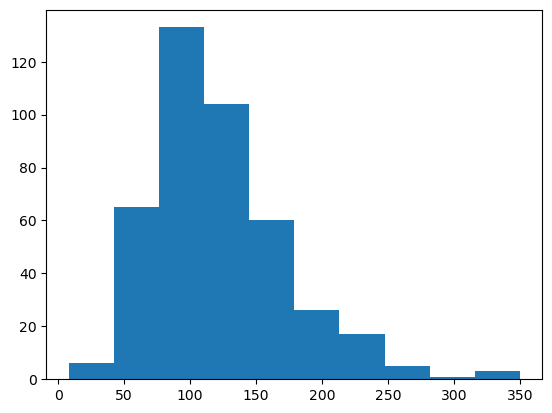

In [71]:
# Look at distribution of token lengths
plt.hist(lyrics_df['num_tokens'])

## Apply cleaning to twitter data

In [72]:
# Update Twitter data type to string
twitter_df['description'] = twitter_df['description'].astype('str')
# Update alternative NA descriptions to NA
twitter_df['description'] = twitter_df['description'].replace(['nan', 'NaN'], pd.NA)
# Fill in any missing values with empty strings
twitter_df['description'] = twitter_df['description'].fillna('')
# Apply pipeline
# Aided with ChatGPT4.o
twitter_df["tokens"] = twitter_df['description'].apply(lambda x: prepare(x, pipeline))
# Count number of tokens per entry
twitter_df["num_tokens"] = twitter_df["tokens"].map(len) 

In [74]:
# Examine results of tokenization, confirm that emojis and hashtags are there
twitter_df['tokens'].head(50)

0                                                    []
1         [𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]
2         [163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]
3                                                 [csu]
4     [writer, washinformer, spelmancollege, alumna,...
5                                                    []
6                [im, unemployed, live, parents, moops]
7                                        [zoowee, mama]
8                                                    []
9     [let, healing, begin, let, us, learn, past, 🇨🇦...
10                                     [thou, wilt, 🖤✨]
11                                                   []
12    [curious, canadian, contemplator, sheher, sexa...
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17    [sheherhers, feminist, lgbtq, blm, mental,

(array([2508299.,  517083.,  358855.,  269313.,  233060.,  201202.,
         114720.,   43318.,   15253.,    4861.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

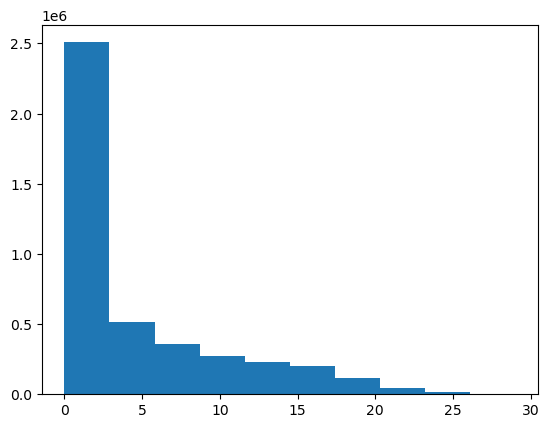

In [48]:
# Outliers are greater than 30 tokens for twitter data
plt.hist(twitter_df.loc[twitter_df['num_tokens'] < 30, 'num_tokens'])

## Examine Emoji Data

Let's take a quick look at some descriptions with emojis.

In [51]:
twitter_df['has_emoji'] = twitter_df['tokens'].apply(contains_emoji)
twitter_df['has_emoji']

0          False
1          False
2           True
3          False
4          False
           ...  
4268136    False
4268137    False
4268138     True
4268139    False
4268140    False
Name: has_emoji, Length: 4268141, dtype: bool

In [53]:
twitter_df[twitter_df.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
428262,cher,God first. Deandrè & Penelopè ❤️ Be better the...,"[god, first, deandrè, penelopè, ❤️, better, ye..."
71315,cher,My laugh 😂,"[laugh, 😂]"
1423487,cher,⚽️Athlete 🌻 14 yrs ⚽️MMHS 🌻,"[⚽️athlete, 🌻, 14, yrs, ⚽️mmhs, 🌻]"
1399975,cher,Life 👑,"[life, 👑]"
965817,cher,Living my best life in the beautiful PNW 🌲👬📷. ...,"[living, best, life, beautiful, pnw, 🌲👬📷, comm..."
1306732,cher,"Un lunático como cualquiera, sin filtro. Si te...","[un, lunático, como, cualquiera, sin, filtro, ..."
2102604,cher,i love my man and my kids also my pitt molly❤️,"[love, man, kids, also, pitt, molly❤️]"
171880,cher,Me🌷😍,[me🌷😍]
2593992,cher,Hey I'm 31 from the Boston Mass. area!! I'm in...,"[hey, m, 31, boston, mass, area, m, boyzgirlz,..."
748541,cher,Beyond the archetype/EMT-BREC🏥🚑MD/Rotarian⚙️/F...,"[beyond, archetypeemtbrec🏥🚑mdrotarian⚙️fitipal..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: Another improvement could be to convert emojis to their respective text label or sentiment label. 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [75]:
# Aided with ChatGPT4.o
# Cher Lyrics
cher_tokens = [token for sublist in lyrics_df.loc[lyrics_df['artist'] == 'cher', 'tokens'] for token in sublist]
cher_lyric_stats = descriptive_stats(cher_tokens)

print(cher_lyric_stats)

There are 35684 tokens in the data.
There are 3684 unique tokens in the data.
There are 169160 characters in the data.
The lexical diversity is 0.103 in the data.
The 5 most common tokens are:
'love': 966 times
'im': 511 times
'know': 480 times
'dont': 430 times
'na': 348 times
[35684, 3684, 0.1032395471359713, 169160]


In [76]:
# Aided with ChatGPT4.o
# Robyn Lyrics
robyn_tokens = [token for sublist in lyrics_df.loc[lyrics_df['artist'] == 'robyn', 'tokens'] for token in sublist]
robyn_lyric_stats = descriptive_stats(robyn_tokens)

print(robyn_lyric_stats)

There are 15244 tokens in the data.
There are 2138 unique tokens in the data.
There are 72800 characters in the data.
The lexical diversity is 0.140 in the data.
The 5 most common tokens are:
'know': 305 times
'im': 299 times
'dont': 297 times
'got': 274 times
'love': 269 times
[15244, 2138, 0.14025190238782473, 72800]


Q: what observations do you make about these data? 

A: The Cher corpus is about 2.5 times larger and also has more unique tokens. The ratio of characters to tokens is about the same between the two. Robyn has more lexical diversity. The top 5 common tokens are very similar.


## Find tokens uniquely related to a corpus

In [85]:
# Aided with ChatGPT4.o
# Create function to calculate concentratin of each token using count and length
def compute_concentration(tokens, total_length):
    token_counts = Counter(tokens)
    concentration = {token: count / total_length for token, count in token_counts.items()}
    return concentration

# Create function to find top 10 tokens using a cut off concentration value of 5
def find_top_tokens(corpora, cutoff=5, top_n=10):
    corpus_lengths = {name: len(tokens) for name, tokens in corpora.items()}
    concentrations = {name: compute_concentration(tokens, corpus_lengths[name]) for name, tokens in corpora.items()}
    
    # Create a DataFrame to hold token counts for each corpus
    all_tokens = set(token for tokens in corpora.values() for token in tokens)
    token_counts_df = pd.DataFrame(index=list(all_tokens), columns=corpora.keys()).fillna(0)
    
    for name, tokens in corpora.items():
        token_counts = Counter(tokens)
        for token, count in token_counts.items():
            token_counts_df.at[token, name] = count
    
    # Filter tokens by cutoff
    valid_tokens = token_counts_df[token_counts_df.min(axis=1) >= cutoff]
    
    # Compute concentration ratios
    ratios = {}
    for name in corpora.keys():
        other_names = [other for other in corpora.keys() if other != name]
        ratios[name] = valid_tokens[name] / valid_tokens[other_names].mean(axis=1)
    
    # Find top N tokens for each corpus
    top_tokens = {}
    for name in ratios.keys():
        top_tokens[name] = ratios[name].nlargest(top_n).index.tolist()
    
    return top_tokens

## Lyrics Corpora

In [91]:
# Aided with ChatGPT4.o
# Convert Lyrics Dataframe into a dictionary of artist:token
lyric_corpora_tokens = {
    'Cher': [token for sublist in lyrics_df.loc[lyrics_df['artist'] == 'cher', 'tokens'] for token in sublist],
    'Robyn': [token for sublist in lyrics_df.loc[lyrics_df['artist'] == 'robyn', 'tokens'] for token in sublist]
}

In [92]:
# Aided with ChatGPT4.o
# Apply function to corpora to get output for each artist
top_lyric = find_top_tokens(lyric_corpora_tokens, cutoff=5, top_n=10)
top_lyric

C:\Users\halee\AppData\Local\Temp\ipykernel_27800\122843694.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  token_counts_df = pd.DataFrame(index=list(all_tokens), columns=corpora.keys()).fillna(0)


{'Cher': ['walk',
  'find',
  'enough',
  'without',
  'man',
  'strong',
  'live',
  'believe',
  'tears',
  'well'],
 'Robyn': ['beat',
  'dance',
  'work',
  'hang',
  'alright',
  'shake',
  'forgive',
  'party',
  '88',
  'space']}

## Twitter Corpora

In [93]:
# Convert Twitter Dataframe into a dictionary of artist:token
twitter_corpora_tokens = {
    'Cher': [token for sublist in twitter_df.loc[twitter_df['artist'] == 'cher', 'tokens'] for token in sublist],
    'Robyn': [token for sublist in twitter_df.loc[twitter_df['artist'] == 'robynkonichiwa', 'tokens'] for token in sublist]
}

In [94]:
# Apply function to corpora to get output for each artist
top_twitter = find_top_tokens(twitter_corpora_tokens, cutoff=5, top_n=10)
top_twitter

C:\Users\halee\AppData\Local\Temp\ipykernel_27800\122843694.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  token_counts_df = pd.DataFrame(index=list(all_tokens), columns=corpora.keys()).fillna(0)


{'Cher': ['grandmother',
  'fbr',
  'resister',
  'nana',
  'rbsoul',
  'grandma',
  'theresistance',
  'hiphoprap',
  'gop',
  'grandchildren'],
 'Robyn': ['vänner',
  'bäst',
  'sveriges',
  'träning',
  'brinner',
  'följ',
  'gärna',
  'arbetar',
  'varje',
  'familj']}

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: For Cher tweets, there is some political discourse happening which is interesting, and it seems like her fans might view her as a grandmother figure. For Robyn, the unique words are in Swedish. After translating to English, family and friends are mentioned. Her fan base might speak this language more than English. 

## Build word clouds for all four corpora. 

In [95]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

### Lyrics Word Cloud

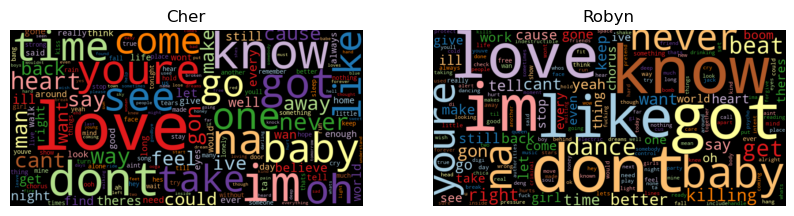

In [96]:
# Aided with ChatGPT4.o
# Count word frequencies for lyric corpus
cher_lyric_freq = count_words(lyrics_df[lyrics_df['artist'] == 'cher'])
robyn_lyric_freq = count_words(lyrics_df[lyrics_df['artist'] == 'robyn'])

# Generate word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud(cher_lyric_freq['freq'], title='Cher')

plt.subplot(1, 2, 2)
wordcloud(robyn_lyric_freq['freq'], title='Robyn')

plt.show()

### Twitter Word Cloud

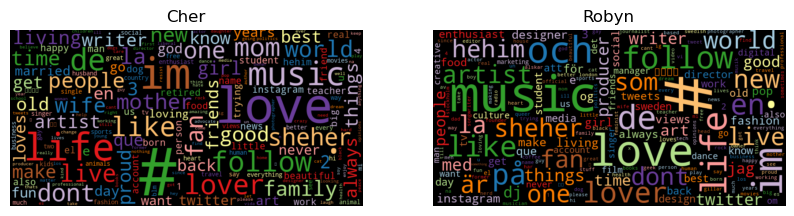

In [97]:
# Aided with ChatGPT4.o
# Count word frequencies for twitter corpus
cher_twitter_freq = count_words(twitter_df[twitter_df['artist'] == 'cher'])
robyn_twitter_freq = count_words(twitter_df[twitter_df['artist'] == 'robynkonichiwa'])

# Generate word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
wordcloud(cher_twitter_freq['freq'], title='Cher')

plt.subplot(1, 2, 2)
wordcloud(robyn_twitter_freq['freq'], title='Robyn')

plt.show()

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: There is similarity between each artist for both lyrics and twitter tokens. The same higher frequency words are seen in both plots.